<h1 style="text-align:center; font-size:40px; color:black;"> Telco Customer Churn Prediction</h1>

<h1 style="font-size:32px;"> 📖 Project Summary </h1>

The Telco Customer Churn project focuses on understanding why customers leave a telecommunications company. Customer churn is a major problem for companies because keeping existing customers is usually cheaper than getting new ones. In this project, we use a dataset provided by IBM that contains information about 7,043 customers of a fictional telecom company in California.

The goal of this project is to analyze customer behavior and identify patterns that lead to churn. By doing this, companies can create strategies to retain customers, improve services, and target the right offers to the right people. This project also helps us understand how predictive models can be applied to real-world business problems.

# 🧠 Customer Churn Prediction - Modeling

This notebook focuses on **building and evaluating machine learning models** for predicting customer churn using the **cleaned dataset** that was prepared in the previous **EDA & Data Cleaning notebook**.  

📌 For details on data exploration and preprocessing steps, please refer to the **EDA and Data Cleaning notebook**.  

This notebook will focus on:
- Data preparation for modeling  
- Model training and evaluation  
- Comparing different algorithms  
- Drawing insights from model performance


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


In [2]:
# Load the cleaned dataset
df = pd.read_csv("Telco_Customer_Churn_Cleaned.csv")

print(df.shape)
df.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# ⚙️ Feature Engineering

- Numeric columns are left untouched.
- Categorical columns are one-hot encoded.

In [3]:
#  Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [4]:
# Identify categorical & numeric features
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

print("Categorical columns:", cat_cols)
print("\nNumeric columns:", num_cols)

Categorical columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Numeric columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [5]:
# Preprocessor for tree-based models
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ])

#### Train-test split

- Training set (80%): used by the model to learn patterns in the data.
- Testing set (20%): held out and only used to evaluate performance on unseen data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (5634, 19)
Test set size: (1409, 19)


# 📌 Modeling: tree-based algorithms

### Decision Tree, Random Forest, XGBoost, LightGBM

- **Handle categorical variables well**: they don’t assume linear relationships.
- **Robust to outliers and skewed data**: unlike Logistic Regression, scaling isn’t critical.
- **Capture non-linear patterns**: customer churn often depends on interactions. 
- **Feature importance**: we can interpret what drives churn.
- **Ensemble power (RF, XGB, LGBM)**: boost accuracy and reduce overfitting.

In [7]:
# Initialize models
models = {
    "Decision Tree": Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', DecisionTreeClassifier(random_state=42))]),
    
    "Random Forest": Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', RandomForestClassifier(random_state=42))]),
    
    "XGBoost": Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', XGBClassifier(eval_metric='logloss', random_state=42))]),
    
    "LightGBM": Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', LGBMClassifier(random_state=42))])
}

models

{'Decision Tree': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('cat',
                                                   OneHotEncoder(handle_unknown='ignore'),
                                                   Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object')),
                                                  ('num', 'passthrough',
                                                   Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                 ('model', DecisionTreeClassifier(random_state=42))]),
 'Random Forest': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('cat',
                                                   OneHotEn

# 🔎 Model Training & Evaluation

Evaluate performance using:

* Accuracy -> overall correctness

* Precision -> how many predicted churns were actually churn

* Recall -> how many actual churns we caught

* F1-score -> balance between precision & recall

* ROC-AUC -> ability to separate churn vs non-churn

In [8]:
y_test_numeric = y_test.map({'No':0, 'Yes':1}) if y_test.dtype == 'object' else y_test

results = {}

for name, model in models.items():

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    y_prob = model.predict_proba(X_test)[:,1]  # probability of class 1 (Churn=Yes)
    
    # 4Evaluate metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test_numeric, y_prob)
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T

# Display results
print(results_df)

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
               Accuracy  Precision    Recall  F1 Score   ROC-AUC
Decision Tree  0.722498   0.478149  0.497326  0.487549  0.650353
Random Forest  0.788502   0.630137  0.491979  0.552553  0.816602
XGBoost        0.781405   0.605096  0.508021  0.552326  0.817892
LightGBM       0.790632   0.624606  0.529412  0.573082  0.835168


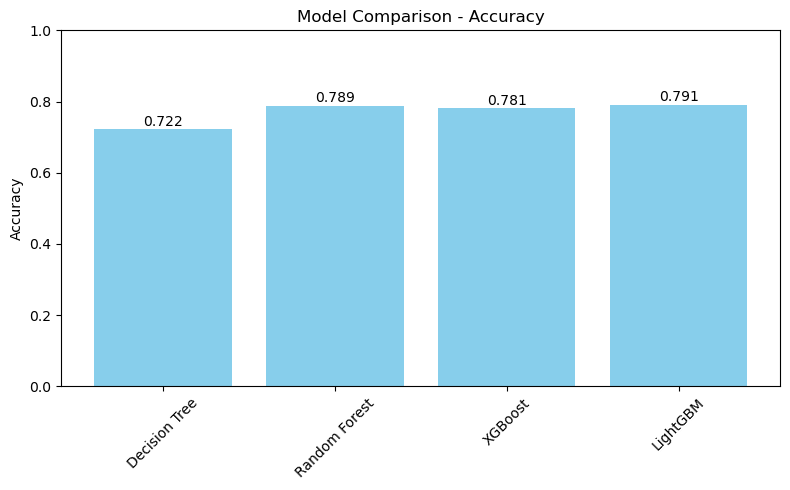

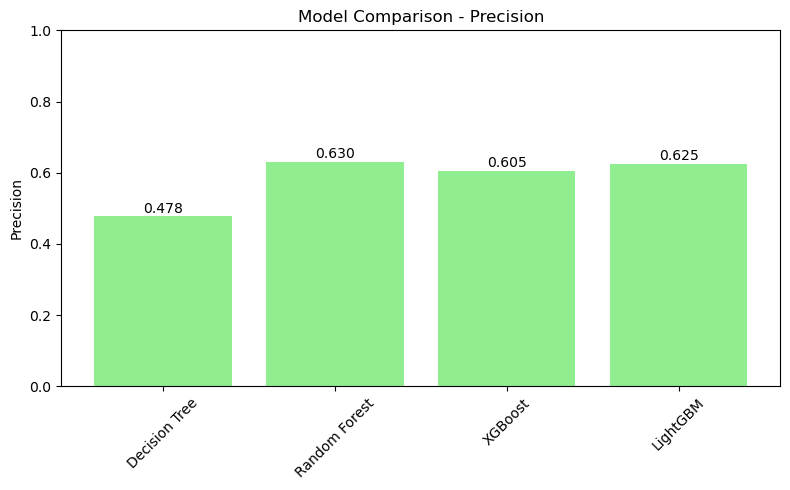

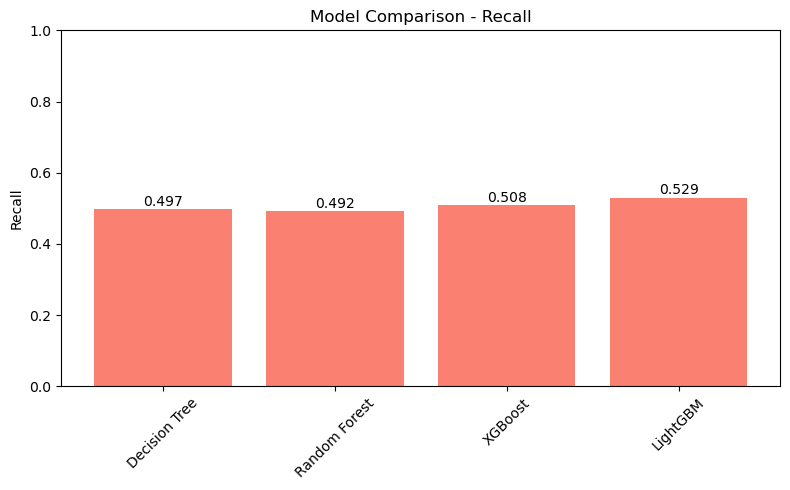

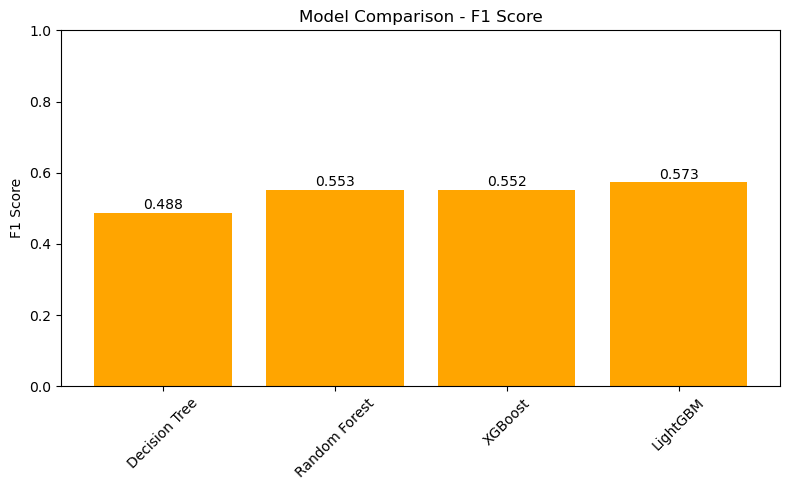

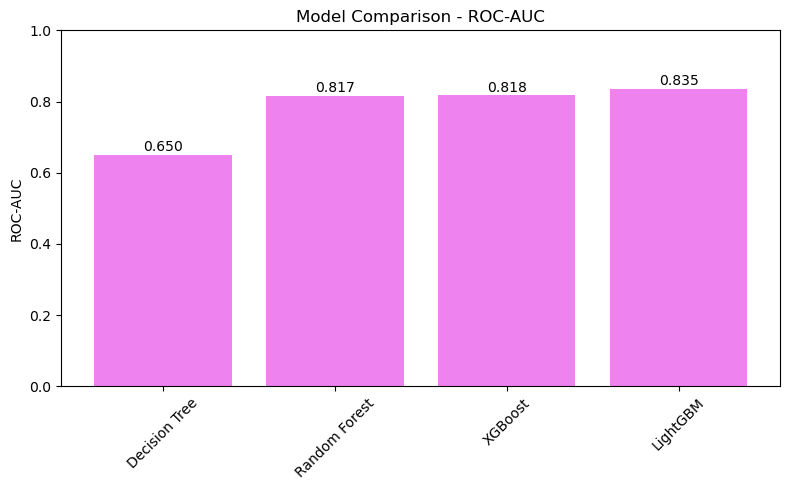

In [9]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
colors = ["skyblue", "lightgreen", "salmon", "orange", "violet"]  

for metric, color in zip(metrics, colors):
    plt.figure(figsize=(8,5))
    plt.bar(results_df.index, results_df[metric], color=color)
    plt.xticks(rotation=45)
    plt.ylim(0,1)
    plt.title(f"Model Comparison - {metric}")
    plt.ylabel(metric)
    
    # Add value labels
    for i, v in enumerate(results_df[metric]):
        plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()


--- 

# 📊 Model Comparison Findings

#### Accuracy
- **LightGBM**: highest at **79%**  
- **Decision Tree**: lowest at **72%**  
Accuracy shows how often the model is correct overall.

#### Precision
- **Random Forest (63%)** and **LightGBM (62%)** lead.  
- High precision means fewer false positives → when the model predicts churn, it’s usually correct.

#### Recall
- **LightGBM (53%)** is best.  
- Recall captures how many actual churners the model identifies → fewer missed churn customers.

#### F1 Score
- **LightGBM (0.57)** balances precision & recall better than the others.  
- Good choice when both false positives and false negatives matter.

#### ROC-AUC
- **LightGBM (0.84)** is strongest, followed by **XGBoost (0.82)** and **Random Forest (0.82)**.  
- ROC-AUC shows ranking ability → how well the model separates churn vs non-churn.



### Takeaway
- **Decision Tree** is weakest and prone to overfitting.  
- **Ensemble models** (Random Forest, XGBoost, LightGBM) consistently outperform single tree models.  
- **LightGBM** is the **best overall choice**: high accuracy, strong recall, balanced F1, and top ROC-AUC.  This makes it the most reliable for **predicting churn and guiding retention strategies**.  .